In [1]:
# Installations nécessaires
!pip install pandas matplotlib numpy pillow tensorboardX tensorflow scikit-learn

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorboardX import SummaryWriter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print("Tous les paquets ont été importés avec succès!")

Tous les paquets ont été importés avec succès!


Nombre d'images chargées: 7500
Nombre d'étiquettes: 7500


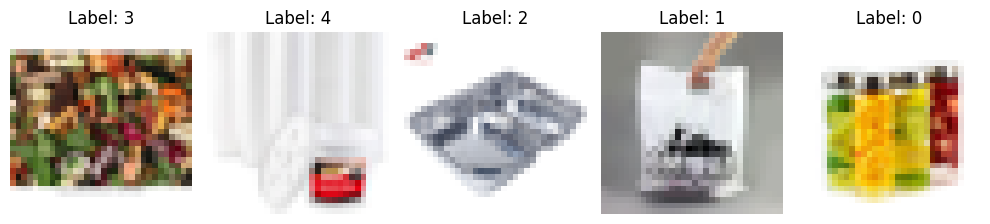

In [2]:
# Fonction pour charger les données
def load_data_from_directory(dirs):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Others': 4,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path).convert('RGB')  # Charger l'image en couleur
                img_resized = img.resize((32, 32))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
                    
    return np.array(data), np.array(labels)

# Chemins des répertoires
dirs = [
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Glass',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Plastic',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Others',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Organic',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Aluminium'
]

# Charger les données
data, labels = load_data_from_directory(dirs)

# Afficher les dimensions des données chargées
print(f"Nombre d'images chargées: {data.shape[0]}")
print(f"Nombre d'étiquettes: {labels.shape[0]}")

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=5)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Afficher quelques exemples d'images avec leurs étiquettes
def display_sample_images(images, labels, n=5):
    plt.figure(figsize=(10, 2 * n))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Afficher quelques échantillons d'images
display_sample_images(train_data, train_labels, n=5)

D:\Projet_Annuel_M1_2024\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.3462 - loss: 1.4916 - val_accuracy: 0.5293 - val_loss: 1.2311
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5422 - loss: 1.1790 - val_accuracy: 0.5687 - val_loss: 1.1340
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6013 - loss: 1.0308 - val_accuracy: 0.6140 - val_loss: 1.0428
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6564 - loss: 0.9038 - val_accuracy: 0.6353 - val_loss: 1.0098
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7042 - loss: 0.8068 - val_accuracy: 0.6467 - val_loss: 0.9867
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7442 - loss: 0.7115 - val_accuracy: 0.6807 - val_loss: 0.9100
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7744 - loss: 0.6187 - val_accuracy: 0.6767 - val_loss: 0.9321
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8190 - loss: 0.5200 - val_acc

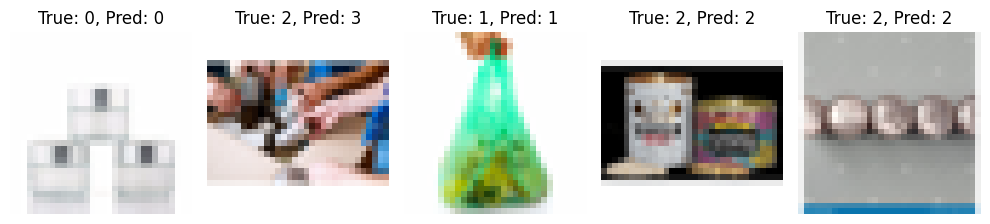

In [3]:
# Définir le modèle CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher quelques exemples de prédictions
def display_sample_predictions(images, labels, model, n=5):
    predictions = model.predict(images[:n])
    plt.figure(figsize=(10, 2 * n))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {np.argmax(labels[i])}, Pred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Note: We need to reshape test_data back to the original image shape for visualization
display_sample_predictions(test_data, test_labels, model, n=5)


Epoch 1/30


D:\Projet_Annuel_M1_2024\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.2418 - loss: 1.5810 - val_accuracy: 0.3940 - val_loss: 1.4037
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4001 - loss: 1.4011 - val_accuracy: 0.4793 - val_loss: 1.3102
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4569 - loss: 1.3207 - val_accuracy: 0.5000 - val_loss: 1.2759
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4834 - loss: 1.2663 - val_accuracy: 0.5260 - val_loss: 1.2357
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4897 - loss: 1.2597 - val_accuracy: 0.5153 - val_loss: 1.2211
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5072 - loss: 1.2258 - val_accuracy: 0.5473 - val_loss: 1.1579
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5296 - loss: 1.1706 - val_accuracy: 0.5567 - val_loss: 1.1209
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5589 - loss: 1.1359 - val_accuracy: 0.57

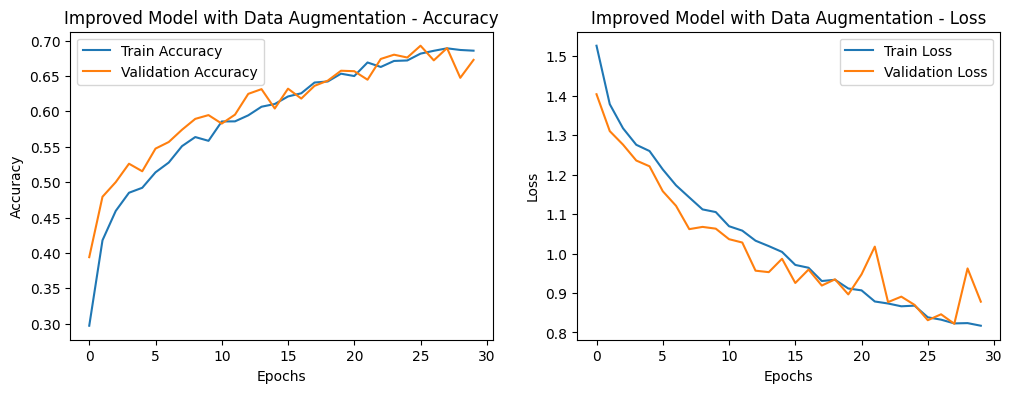

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image

# Fonction pour charger les données
def load_data_from_directory(dirs):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Others': 4,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path).convert('RGB')
                img_resized = img.resize((32, 32))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
                    
    return np.array(data), np.array(labels)

# Chemins des répertoires
dirs = [
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Glass',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Plastic',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Others',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Organic',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Aluminium'
]

# Charger les données
data, labels = load_data_from_directory(dirs)

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=5)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Préparer le générateur de données pour l'entraînement
datagen.fit(train_data)

# Définir le modèle CNN amélioré
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=30,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance
plot_history(history, 'Improved Model with Data Augmentation')



Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.4184 - loss: 1.4067 - val_accuracy: 0.5440 - val_loss: 1.1776
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 165ms/step - accuracy: 0.5415 - loss: 1.1587 - val_accuracy: 0.5687 - val_loss: 1.0850
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.5772 - loss: 1.0914 - val_accuracy: 0.5940 - val_loss: 1.0420
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.6031 - loss: 1.0446 - val_accuracy: 0.6047 - val_loss: 1.0152
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - accuracy: 0.6167 - loss: 1.0109 - val_accuracy: 0.6027 - val_loss: 0.9927
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.6118 - loss: 0.9859 - val_accuracy: 0.6133 - val_loss: 0.9730
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.6443 - loss: 0.9440 - val_accuracy: 0.6373 - val_loss: 0.9501
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.6325 - loss: 0

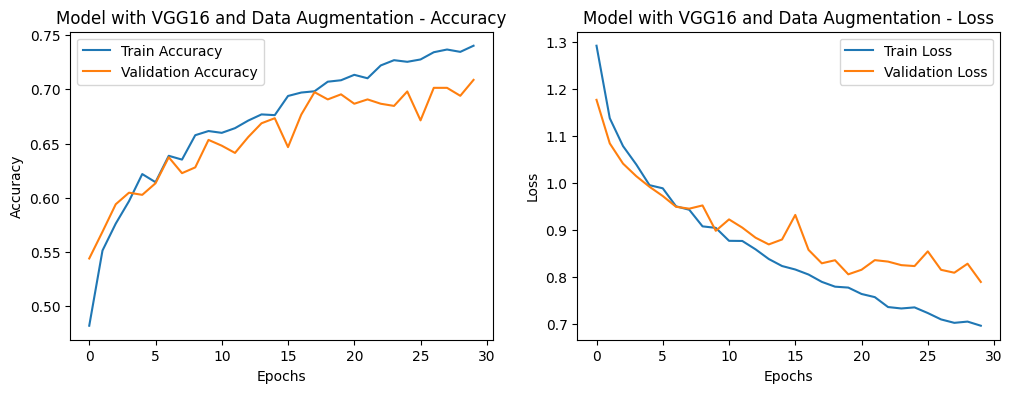

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Charger le modèle VGG16 pré-entrainé
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Ajouter des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Définir le modèle complet
model = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches de VGG16 pour ne pas les entraîner à nouveau
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=30,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy with VGG16: {test_acc:.2f}')

# Afficher les courbes de performance
plot_history(history, 'Model with VGG16 and Data Augmentation')


Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 154s 614ms/step - accuracy: 0.6181 - loss: 1.0725 - val_accuracy: 0.8433 - val_loss: 0.4541
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 74s 389ms/step - accuracy: 0.7913 - loss: 0.5756 - val_accuracy: 0.8653 - val_loss: 0.3955
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 68s 358ms/step - accuracy: 0.8164 - loss: 0.4894 - val_accuracy: 0.8713 - val_loss: 0.3868
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 67s 351ms/step - accuracy: 0.8494 - loss: 0.4251 - val_accuracy: 0.8793 - val_loss: 0.3562
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 68s 358ms/step - accuracy: 0.8632 - loss: 0.3851 - val_accuracy: 0.8900 - val_loss: 0.3469
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 67s 353ms/step - accuracy: 0.8660 - loss: 0.3766 - val_accuracy: 0.8893 - val_loss: 0.3269
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 68s 357ms/step - accuracy: 0.8818 - loss: 0.3391 - val_accuracy: 0.8920 - val_loss: 0.3310
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 67s 350ms/step - accuracy: 0.8892 - loss: 

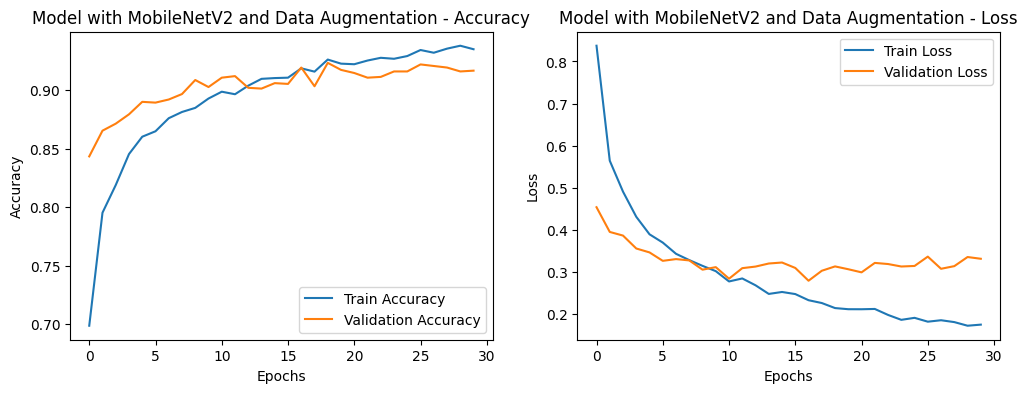

In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image

# Fonction pour charger les données (inchangée)
def load_data_from_directory(dirs):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Others': 4,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path).convert('RGB')
                img_resized = img.resize((128, 128))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
                    
    return np.array(data), np.array(labels)

# Chemins des répertoires (inchangés)
dirs = [
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Glass',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Plastic',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Others',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Organic',
    'D:\Projet_Annuel_M1_2024\DataSet_2024\DataSet_2024\Aluminium'
]

# Charger les données
data, labels = load_data_from_directory(dirs)

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=5)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(train_data)

# Charger le modèle MobileNetV2 pré-entrainé
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Ajouter des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

# Définir le modèle complet
model = Model(inputs=base_model.input, outputs=predictions)

# Geler les premières couches de MobileNetV2 pour ne pas les entraîner à nouveau
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=30,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy with MobileNetV2: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance
plot_history(history, 'Model with MobileNetV2 and Data Augmentation')


In [ ]:
# Décongeler les dernières couches de MobileNetV2
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompiler le modèle avec un taux d'apprentissage plus faible pour fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Ré-entraîner le modèle
history_fine_tune = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                              epochs=10,  # Entraîner pour quelques époques supplémentaires
                              validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy after fine-tuning: {test_acc:.2f}')


Epoch 1/10
